In [1]:
from csv import reader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import datetime
from collections import Counter

In [2]:
# DO NOT USE - for array population only
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [3]:
#data = pd.read_csv('data/location_transfer.csv', index_col='PERSON_ID')
data = pd.read_csv('../data/location_transfer.csv')

In [4]:
data[:22]

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME
0,5076351,232202115,2019-10-30 01:14:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
1,5076351,232202115,2019-10-30 04:41:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
2,5076351,232202115,2019-10-30 04:47:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
3,5076351,232202115,2019-10-30 09:06:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
4,5076351,232202115,2019-10-30 10:24:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
5,5076351,232202115,2019-10-30 21:36:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
6,5076351,232202115,2019-10-30 21:50:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA
7,5076351,232202115,2019-10-30 21:50:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
8,5076351,232202115,2019-10-30 23:59:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA
9,5076351,232202115,2019-10-31 23:59:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA


In [5]:
dataset = data[['VISIT_OCCURRENCE_ID', 'CARE_SITE_DATETIME', 'CARE_SITE_NAME']]
dataset['id'] = pd.Categorical((pd.factorize(data.VISIT_OCCURRENCE_ID)[0]))

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
dataset[:22]

,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,CARE_SITE_NAME,id
0,232202115,2019-10-30 01:14:00.0000000,VUH EMERGENCY,0
1,232202115,2019-10-30 04:41:00.0000000,VUH EMERGENCY,0
2,232202115,2019-10-30 04:47:00.0000000,VUH EMERGENCY,0
3,232202115,2019-10-30 09:06:00.0000000,VUH EMERGENCY,0
4,232202115,2019-10-30 10:24:00.0000000,VUH EMERGENCY,0
5,232202115,2019-10-30 21:36:00.0000000,VUH EMERGENCY,0
6,232202115,2019-10-30 21:50:00.0000000,VUH 10N TRAUMA,0
7,232202115,2019-10-30 21:50:00.0000000,VUH EMERGENCY,0
8,232202115,2019-10-30 23:59:00.0000000,VUH 10N TRAUMA,0
9,232202115,2019-10-31 23:59:00.0000000,VUH 10N TRAUMA,0


In [7]:
edges = []
for i in range(1, 22):
    if (dataset.CARE_SITE_NAME.values[i] != dataset.CARE_SITE_NAME.values[i-1]) & (dataset.VISIT_OCCURRENCE_ID.values[i] == dataset.VISIT_OCCURRENCE_ID.values[i-1]):
        edges.append((dataset.CARE_SITE_NAME.values[i-1], dataset.CARE_SITE_NAME.values[i]))

In [8]:
edges_df = pd.DataFrame(edges, columns = ['from', 'to'])

In [9]:
edges_df

,from,to
0,VUH EMERGENCY,VUH 10N TRAUMA
1,VUH 10N TRAUMA,VUH EMERGENCY
2,VUH EMERGENCY,VUH 10N TRAUMA
3,VUH 10N TRAUMA,VUH MAIN OR
4,VUH MAIN OR,VUH 10N TRAUMA
5,VUH 10N TRAUMA,VUH MAIN OR
6,VUH MAIN OR,VUH 10N TRAUMA
7,VUH 10N TRAUMA,ZZZ-VUH10SORTHOTRAUMA


In [10]:
graph = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(edges).items())
print(*graph.edges(data=True), sep='\n')

('VUH EMERGENCY', 'VUH 10N TRAUMA', {'weight': 2})
('VUH 10N TRAUMA', 'VUH EMERGENCY', {'weight': 1})
('VUH 10N TRAUMA', 'VUH MAIN OR', {'weight': 2})
('VUH 10N TRAUMA', 'ZZZ-VUH10SORTHOTRAUMA', {'weight': 1})
('VUH MAIN OR', 'VUH 10N TRAUMA', {'weight': 2})


In [11]:
edges_weighted = list(Counter(edges).items())
#params = list((x, y, {'weight':v}) for (x,y), v in edges_weighted)
params = list((x, y, v) for (x,y), v in edges_weighted)
params_df = pd.DataFrame(params, columns = ['from', 'to', 'weight'])

In [12]:
params_df

,from,to,weight
0,VUH EMERGENCY,VUH 10N TRAUMA,2
1,VUH 10N TRAUMA,VUH EMERGENCY,1
2,VUH 10N TRAUMA,VUH MAIN OR,2
3,VUH MAIN OR,VUH 10N TRAUMA,2
4,VUH 10N TRAUMA,ZZZ-VUH10SORTHOTRAUMA,1


In [13]:
#dataset['ID'] = dataset.index.astype('category').cat.rename_categories(range(0, dataset.index.nunique()+1))
#data['id'] = pd.Categorical((pd.factorize(data.PERSON_ID)[0]))
# site_time = data.iloc[:,0]
# location = data.loc[:,'CARE_SITE_NAME']

In [14]:
# populate graph with columns in dataframe
# i think this does the same thing as 'graph' from above
graph2 = nx.Graph()
graph2 = nx.from_pandas_edgelist(params_df[:22], source='from', target='to', edge_attr='weight', create_using=nx.DiGraph())
# graph_small = nx.from_pandas_drataframe(dataset[:300],source='PERSON_ID',
#                                    target='CARE_SITE_NAME',edge_attr=True,
#                                    create_using=nx.DiGraph())
#graph2 = nx.DiGraph.add_weighted_edges_from(edges_weighted)

C:\Users\victo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\victo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


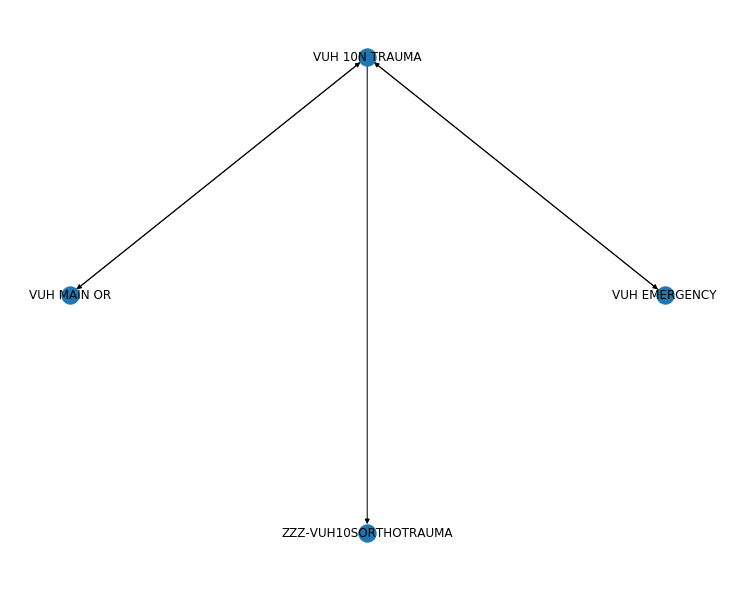

In [15]:
plt.figure(figsize=(10, 8))
nx.draw_shell(graph, with_labels=True)

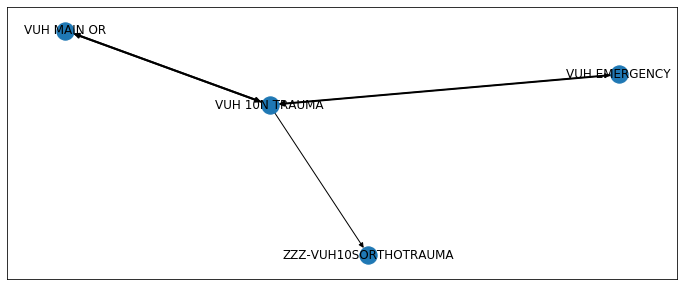

In [16]:
weights = [i['weight'] for i in dict(graph.edges).values()]
labels = [i for i in dict(graph.nodes).keys()]
labels = {i:i for i in dict(graph.nodes).keys()}

fig, ax = plt.subplots(figsize=(12,5))
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, ax = ax, labels=True)
nx.draw_networkx_edges(graph, pos, width=weights, ax=ax)
_ = nx.draw_networkx_labels(graph, pos, labels, ax=ax)

In [17]:
# connections from a single node
graph['VUH EMERGENCY']

AtlasView({'VUH 10N TRAUMA': {'weight': 2}})

In [18]:
total_connections = {}
for x in graph.nodes:
    total_connections[x] = len(graph[x])
s = pd.Series(total_connections, name='transfers')
df2 = s.to_frame().sort_values('transfers', ascending=False)

In [19]:
df2.head()

,transfers
VUH 10N TRAUMA,3
VUH EMERGENCY,1
VUH MAIN OR,1
ZZZ-VUH10SORTHOTRAUMA,0


In [20]:
data2 = pd.read_csv('../data/location_transfer.csv')

In [21]:
data2[:22]

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME
0,5076351,232202115,2019-10-30 01:14:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
1,5076351,232202115,2019-10-30 04:41:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
2,5076351,232202115,2019-10-30 04:47:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
3,5076351,232202115,2019-10-30 09:06:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
4,5076351,232202115,2019-10-30 10:24:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
5,5076351,232202115,2019-10-30 21:36:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
6,5076351,232202115,2019-10-30 21:50:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA
7,5076351,232202115,2019-10-30 21:50:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
8,5076351,232202115,2019-10-30 23:59:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA
9,5076351,232202115,2019-10-31 23:59:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA


In [22]:
data2.dtypes

PERSON_ID                int64
VISIT_OCCURRENCE_ID      int64
CARE_SITE_DATETIME      object
VISIT_START_DATETIME    object
VISIT_END_DATETIME      object
CARE_SITE_ID             int64
CARE_SITE_NAME          object
dtype: object

In [23]:
# day
data2['CARE_SITE_DATETIME'] = data2['CARE_SITE_DATETIME'].astype('datetime64[ns]')
data2['VISIT_START_DATETIME'] = data2['VISIT_START_DATETIME'].astype('datetime64[ns]')
data2['VISIT_END_DATETIME'] = data2['VISIT_END_DATETIME'].astype('datetime64[ns]')

In [24]:
data2.dtypes

PERSON_ID                        int64
VISIT_OCCURRENCE_ID              int64
CARE_SITE_DATETIME      datetime64[ns]
VISIT_START_DATETIME    datetime64[ns]
VISIT_END_DATETIME      datetime64[ns]
CARE_SITE_ID                     int64
CARE_SITE_NAME                  object
dtype: object

In [25]:
data2['DURATION'] = data2['VISIT_END_DATETIME']-data2['VISIT_START_DATETIME']
data2['DURATION_HOURS'] = (data2['DURATION'].dt.total_seconds().astype(int))/3600

In [26]:
data2.drop_duplicates()

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME,DURATION,DURATION_HOURS
0,5076351,232202115,2019-10-30 01:14:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
1,5076351,232202115,2019-10-30 04:41:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
2,5076351,232202115,2019-10-30 04:47:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
3,5076351,232202115,2019-10-30 09:06:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
4,5076351,232202115,2019-10-30 10:24:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
...,...,...,...,...,...,...,...,...,...
4185118,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,1731232,VUH EMERGENCY,2 days 03:22:00,51.366667
4185119,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667
4185120,214494611,316363264,2021-09-06 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667
4185121,214494611,316363264,2021-09-07 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667


In [27]:
data2['VSTART_YEAR'] = data2['VISIT_START_DATETIME'].dt.year
data2['VSTART_MONTH'] = data2['VISIT_START_DATETIME'].dt.month
data2['VSTART_DATE'] = data2['VISIT_START_DATETIME'].dt.day
data2['VEND_YEAR'] = data2['VISIT_END_DATETIME'].dt.year
data2['VEND_MONTH'] = data2['VISIT_END_DATETIME'].dt.month
data2['VEND_DATE'] = data2['VISIT_END_DATETIME'].dt.day

In [28]:
data2

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME,DURATION,DURATION_HOURS,VSTART_YEAR,VSTART_MONTH,VSTART_DATE,VEND_YEAR,VEND_MONTH,VEND_DATE
0,5076351,232202115,2019-10-30 01:14:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
1,5076351,232202115,2019-10-30 04:41:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
2,5076351,232202115,2019-10-30 04:47:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
3,5076351,232202115,2019-10-30 09:06:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
4,5076351,232202115,2019-10-30 10:24:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185118,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,1731232,VUH EMERGENCY,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185119,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185120,214494611,316363264,2021-09-06 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185121,214494611,316363264,2021-09-07 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8


In [29]:
preCovid = data2[data2['VISIT_START_DATETIME'] <= datetime.datetime(2020,3,10)]

In [30]:
postCovid = data2[data2['VISIT_START_DATETIME'] >= datetime.datetime(2020,3,10)]

In [31]:
preCovid

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME,DURATION,DURATION_HOURS,VSTART_YEAR,VSTART_MONTH,VSTART_DATE,VEND_YEAR,VEND_MONTH,VEND_DATE
0,5076351,232202115,2019-10-30 01:14:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
1,5076351,232202115,2019-10-30 04:41:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
2,5076351,232202115,2019-10-30 04:47:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
3,5076351,232202115,2019-10-30 09:06:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
4,5076351,232202115,2019-10-30 10:24:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184635,214444397,94052784,2019-02-07 21:29:00,2019-02-06 19:40:00,2019-02-08 17:12:00,4481006,VUH 6CCT NEURO ICU,1 days 21:32:00,45.533333,2019,2,6,2019,2,8
4184636,214444397,94052784,2019-02-07 23:05:00,2019-02-06 19:40:00,2019-02-08 17:12:00,2991011,ZZZ-VUH10SORTHOTRAUMA,1 days 21:32:00,45.533333,2019,2,6,2019,2,8
4184637,214444397,94052784,2019-02-07 23:05:00,2019-02-06 19:40:00,2019-02-08 17:12:00,4481006,VUH 6CCT NEURO ICU,1 days 21:32:00,45.533333,2019,2,6,2019,2,8
4184638,214444397,94052784,2019-02-07 23:59:00,2019-02-06 19:40:00,2019-02-08 17:12:00,2991011,ZZZ-VUH10SORTHOTRAUMA,1 days 21:32:00,45.533333,2019,2,6,2019,2,8


In [32]:
postCovid

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME,DURATION,DURATION_HOURS,VSTART_YEAR,VSTART_MONTH,VSTART_DATE,VEND_YEAR,VEND_MONTH,VEND_DATE
209,5076607,319061642,2021-07-28 09:59:00,2021-07-28 17:34:00,2021-08-03 16:54:00,25181000,MRI MCE 4,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
210,5076607,319061642,2021-07-28 13:00:00,2021-07-28 17:34:00,2021-08-03 16:54:00,25181000,MRI MCE 4,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
211,5076607,319061642,2021-07-28 13:01:00,2021-07-28 17:34:00,2021-08-03 16:54:00,241016,ONCOLOGY RADIATION CLINIC PRB B,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
212,5076607,319061642,2021-07-28 17:33:00,2021-07-28 17:34:00,2021-08-03 16:54:00,241016,ONCOLOGY RADIATION CLINIC PRB B,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
213,5076607,319061642,2021-07-28 17:34:00,2021-07-28 17:34:00,2021-08-03 16:54:00,1731232,VUH EMERGENCY,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185118,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,1731232,VUH EMERGENCY,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185119,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185120,214494611,316363264,2021-09-06 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185121,214494611,316363264,2021-09-07 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8


## Pre COVID

In [33]:
dataset_pre = preCovid[['VISIT_OCCURRENCE_ID', 'CARE_SITE_DATETIME', 'CARE_SITE_NAME']]
dataset_pre['id'] = pd.Categorical((pd.factorize(preCovid.VISIT_OCCURRENCE_ID)[0]))

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
dataset_pre[:500]

,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,CARE_SITE_NAME,id
0,232202115,2019-10-30 01:14:00,VUH EMERGENCY,0
1,232202115,2019-10-30 04:41:00,VUH EMERGENCY,0
2,232202115,2019-10-30 04:47:00,VUH EMERGENCY,0
3,232202115,2019-10-30 09:06:00,VUH EMERGENCY,0
4,232202115,2019-10-30 10:24:00,VUH EMERGENCY,0
...,...,...,...,...
684,222521219,2019-09-15 23:59:00,VUH 8CCT MEDICAL ICU,26
685,222521219,2019-09-16 23:59:00,VUH 8CCT MEDICAL ICU,26
686,222521219,2019-09-17 23:59:00,VUH 8CCT MEDICAL ICU,26
687,222521219,2019-09-18 23:59:00,VUH 8CCT MEDICAL ICU,26


In [44]:
edges_pre = []
for i in range(1, 2496929): #2496929
    if (dataset_pre.CARE_SITE_NAME.values[i] != dataset_pre.CARE_SITE_NAME.values[i-1]) & (dataset_pre.VISIT_OCCURRENCE_ID.values[i] == dataset_pre.VISIT_OCCURRENCE_ID.values[i-1]):
        edges_pre.append((dataset_pre.CARE_SITE_NAME.values[i-1], dataset_pre.CARE_SITE_NAME.values[i]))

In [36]:
edges_df_pre = pd.DataFrame(edges_pre, columns = ['from', 'to'])

In [45]:
edges_df_pre

,id,from,to
0,232202115,VUH EMERGENCY,VUH 10N TRAUMA
1,232202115,VUH 10N TRAUMA,VUH EMERGENCY
2,232202115,VUH EMERGENCY,VUH 10N TRAUMA
3,232202115,VUH 10N TRAUMA,VUH MAIN OR
4,232202115,VUH MAIN OR,VUH 10N TRAUMA
...,...,...,...
165,222521219,VUH HOSPITAL LAB,VUH MAIN OR
166,222521219,VUH MAIN OR,VUH 8MCE MEDICINE CARDIAC STEPDOWN
167,222521219,VUH 8MCE MEDICINE CARDIAC STEPDOWN,VUH HOSPITAL LAB
168,222521219,VUH HOSPITAL LAB,VUH 8MCE MEDICINE CARDIAC STEPDOWN


In [51]:
#edges_df_pre['id'].value_counts().mean()

6.538461538461538

In [43]:
graph_pre = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(edges_pre).items())
print(*graph_pre.edges(data=True), sep='\n')

NetworkXError: Input is not a valid edge list

In [40]:
edges_weighted_pre = list(Counter(edges_pre).items())
#params = list((x, y, {'weight':v}) for (x,y), v in edges_weighted)
params_pre = list((x, y, v) for (x,y), v in edges_weighted_pre)
params_df_pre = pd.DataFrame(params_pre, columns = ['from', 'to', 'weight'])

ValueError: too many values to unpack (expected 2)

In [139]:
params_df_pre

,from,to,weight
0,VUH EMERGENCY,VUH 10N TRAUMA,8170
1,VUH 10N TRAUMA,VUH EMERGENCY,2862
2,VUH 10N TRAUMA,VUH MAIN OR,4913
3,VUH MAIN OR,VUH 10N TRAUMA,5401
4,VUH 10N TRAUMA,ZZZ-VUH10SORTHOTRAUMA,1190
...,...,...,...
6467,VUH HOSPITAL LAB,VUH 10S TRAUMA STEPDOWN,2
6468,VCH 8B SURGERY,VCH 7A MEDICINE,1
6469,VUH 11S BURN UNIT,VUH 7CCT ORTHO,2
6470,VUH 7CCT ORTHO,VUH 11S BURN UNIT,1


In [97]:
graph2_pre = nx.Graph()
graph2_pre = nx.from_pandas_edgelist(params_df_pre[:500], source='from', target='to', edge_attr='weight', create_using=nx.DiGraph())

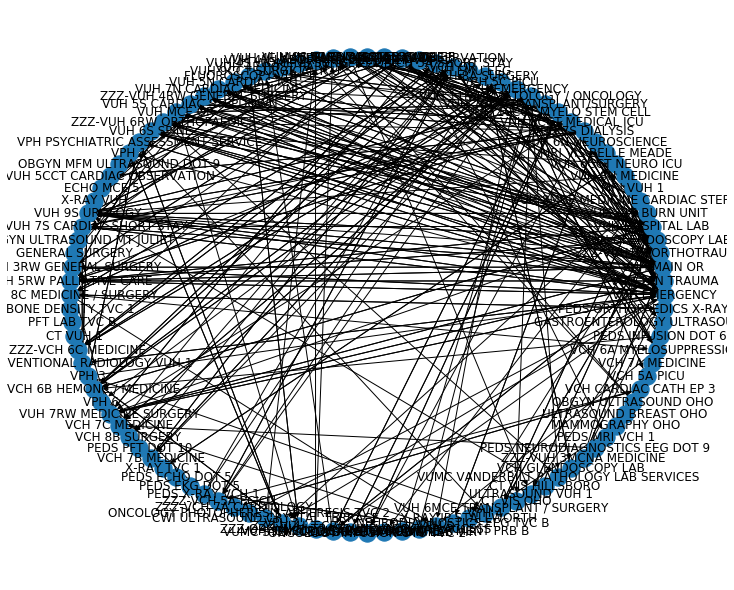

In [98]:
plt.figure(figsize=(10, 8))
nx.draw_shell(graph2_pre, with_labels=True)

In [99]:
close_pre = nx.closeness_centrality(graph2_pre)

bet_pre = nx.betweenness_centrality(graph2_pre)

ein_pre = nx.eigenvector_centrality(graph2_pre, 1000)

In [100]:
print(close_pre)

{'VUH EMERGENCY': 0.4278727422400852, 'VUH 10N TRAUMA': 0.3036008796041781, 'VUH MAIN OR': 0.3840904151271463, 'ZZZ-VUH10SORTHOTRAUMA': 0.3058497750086535, 'VUH GI ENDOSCOPY LAB': 0.31518869943639866, 'VUH HOSPITAL LAB': 0.40282653293822657, 'VUH 11S BURN UNIT': 0.3069867630198381, 'VUH 8MCE MEDICINE CARDIAC STEPDOWN': 0.3384403248046576, 'MRI VUH 1': 0.27711221225616256, 'VUH 8N MEDICINE': 0.30928628933459346, 'VUH 6CCT NEURO ICU': 0.3104490197456257, 'MRI VIS BELLE MEADE': 0.0, 'VUH 6N NEUROSCIENCE': 0.341237352282382, 'VUH 7S DIALYSIS': 0.3303177570093458, 'VUH 8CCT MEDICAL ICU': 0.3238409382444567, 'VUH 10CCT MYELO STEM CELL': 0.3036008796041781, 'VUH 7CCT TRANSPLANT/SURGERY': 0.3163963189744691, 'VUH 11N HEMATOLOGY / ONCOLOGY': 0.30928628933459346, 'VCH EMERGENCY': 0.3069867630198381, 'VCH 5C PICU': 0.26299184475266385, 'VCH 8A SURGERY': 0.26299184475266385, 'VUH EMU EEG': 0.24650578881294463, 'VCH OR': 0.3384403248046576, 'ZZZ-VCH 3A SHORT STAY': 0.2580607476635514, 'PET VUH 1': 

In [101]:
print(bet_pre)

{'VUH EMERGENCY': 0.285239118349566, 'VUH 10N TRAUMA': 0.0008852288931795604, 'VUH MAIN OR': 0.0697454838525955, 'ZZZ-VUH10SORTHOTRAUMA': 0.0024227755877169305, 'VUH GI ENDOSCOPY LAB': 0.009039248806804906, 'VUH HOSPITAL LAB': 0.22786147220155142, 'VUH 11S BURN UNIT': 0.0017100610845100356, 'VUH 8MCE MEDICINE CARDIAC STEPDOWN': 0.026804662946160296, 'MRI VUH 1': 0.0, 'VUH 8N MEDICINE': 0.0018910215061687463, 'VUH 6CCT NEURO ICU': 0.024514917673090827, 'MRI VIS BELLE MEADE': 0.0, 'VUH 6N NEUROSCIENCE': 0.05201729888686027, 'VUH 7S DIALYSIS': 0.02153788437600679, 'VUH 8CCT MEDICAL ICU': 0.012637858823582173, 'VUH 10CCT MYELO STEM CELL': 0.026303268107004625, 'VUH 7CCT TRANSPLANT/SURGERY': 0.014118671143807996, 'VUH 11N HEMATOLOGY / ONCOLOGY': 0.02715581260370539, 'VCH EMERGENCY': 0.11212995011525678, 'VCH 5C PICU': 0.0033151819476982592, 'VCH 8A SURGERY': 0.01744548286604361, 'VUH EMU EEG': 0.0, 'VCH OR': 0.15893926028362854, 'ZZZ-VCH 3A SHORT STAY': 5.388036599463156e-05, 'PET VUH 1': 0

In [102]:
print(ein_pre)

{'VUH EMERGENCY': 0.387281531542274, 'VUH 10N TRAUMA': 0.1448989150870908, 'VUH MAIN OR': 0.36718840462977026, 'ZZZ-VUH10SORTHOTRAUMA': 0.12167237467838364, 'VUH GI ENDOSCOPY LAB': 0.16657479956383722, 'VUH HOSPITAL LAB': 0.25014298418926256, 'VUH 11S BURN UNIT': 0.0938737236625904, 'VUH 8MCE MEDICINE CARDIAC STEPDOWN': 0.1504522219781008, 'MRI VUH 1': 0.022576124826446324, 'VUH 8N MEDICINE': 0.14208364522641861, 'VUH 6CCT NEURO ICU': 0.1063485282900951, 'MRI VIS BELLE MEADE': 5.434073859170153e-21, 'VUH 6N NEUROSCIENCE': 0.12425164542198701, 'VUH 7S DIALYSIS': 0.21689860282817766, 'VUH 8CCT MEDICAL ICU': 0.17534817101379652, 'VUH 10CCT MYELO STEM CELL': 0.10646754393492475, 'VUH 7CCT TRANSPLANT/SURGERY': 0.19081502961700006, 'VUH 11N HEMATOLOGY / ONCOLOGY': 0.12131428342165633, 'VCH EMERGENCY': 0.012071142692845975, 'VCH 5C PICU': 0.007906255850412193, 'VCH 8A SURGERY': 0.004923646840860803, 'VUH EMU EEG': 0.011213965661369677, 'VCH OR': 0.0293554443253001, 'ZZZ-VCH 3A SHORT STAY': 0.

In [106]:
edges_df_pre['to'].value_counts()[:20]

VUH MAIN OR                     48780
VUH EMERGENCY                   34898
VUH HOSPITAL LAB                21727
VUH 4N LABOR AND DELIVERY       17649
VUH 4E POST PARTUM              17424
VUH 7S DIALYSIS                 16858
VUH 10N TRAUMA                  16836
VCH OR                          15845
VUH 7CCT TRANSPLANT/SURGERY     15095
VUH 5N CARDIAC ICU              14783
VUH 8CCT MEDICAL ICU            14440
VUH TRANSITIONAL OBSERVATION    13768
VUH 5CCT CARDIAC CATH EP        13435
VUH 6CCT NEURO ICU              13126
VUH 4S WOMENS SURGERY OR        11237
VCH EMERGENCY                   11147
VUH 8S CARDIAC STEPDOWN         10725
VUH 9CCT SURGICAL ICU           10380
VUH 7N CARDIAC MEDICINE         10093
VUH 6N NEUROSCIENCE             10067
Name: to, dtype: int64

In [107]:
edges_df_pre['from'].value_counts()[:20]

VUH EMERGENCY                         85173
VUH MAIN OR                           62920
VCH EMERGENCY                         28759
VUH 4N LABOR AND DELIVERY             20665
VUH HOSPITAL LAB                      19628
VCH OR                                18457
VUH 7S DIALYSIS                       16806
VUH 5N CARDIAC ICU                    15290
VUH 5CCT CARDIAC CATH EP              15145
VUH 10N TRAUMA                        14929
VUH 8CCT MEDICAL ICU                  13760
VUH 4E MATERNAL SPECIAL CARE          12509
VUH 4S WOMENS SURGERY OR              11865
VUH TRANSITIONAL OBSERVATION          10875
VUH 7CCT TRANSPLANT/SURGERY           10771
VUH 6CCT NEURO ICU                    10674
VUH GI ENDOSCOPY LAB                   8986
VUH 9CCT SURGICAL ICU                  8125
VUH 7N CARDIAC MEDICINE                7859
VPH PSYCHIATRIC ASSESSMENT SERVICE     7545
Name: from, dtype: int64

In [79]:
length_pre = []
for i in range(1, 2496929):
    if (preCovid.VISIT_OCCURRENCE_ID.values[i] != preCovid.VISIT_OCCURRENCE_ID.values[i-1]):
        length_pre.append((preCovid.VISIT_OCCURRENCE_ID.values[i-1], preCovid.DURATION_HOURS.values[i-1]))

In [81]:
length_df_pre = pd.DataFrame(length_pre, columns = ['id', 'length'])

In [82]:
length_df_pre

,id,length
0,232202115,108.000000
1,238622128,25.166667
2,235743585,85.633333
3,48529411,209.250000
4,57462957,44.400000
5,240352791,47.500000
6,78562350,165.833333
7,93241649,73.816667
8,91992740,1170.266667
9,94841968,102.866667


In [83]:
# average length of stay
length_df_pre['length'].mean()

103.1026315789473

In [141]:
# total transfers
params_df_pre['weight'].sum()

607872

## COVID

In [53]:
dataset_covid = postCovid[['VISIT_OCCURRENCE_ID', 'CARE_SITE_DATETIME', 'CARE_SITE_NAME']]
dataset_covid['id'] = pd.Categorical((pd.factorize(postCovid.VISIT_OCCURRENCE_ID)[0]))

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
dataset_covid[:500]

,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,CARE_SITE_NAME,id
209,319061642,2021-07-28 09:59:00,MRI MCE 4,0
210,319061642,2021-07-28 13:00:00,MRI MCE 4,0
211,319061642,2021-07-28 13:01:00,ONCOLOGY RADIATION CLINIC PRB B,0
212,319061642,2021-07-28 17:33:00,ONCOLOGY RADIATION CLINIC PRB B,0
213,319061642,2021-07-28 17:34:00,VUH EMERGENCY,0
...,...,...,...,...
2047,271031052,2020-08-18 10:16:00,VUH 6N NEUROSCIENCE,30
2048,294692014,2021-04-05 05:44:00,VUH MAIN OR,31
2049,294692014,2021-04-05 05:50:00,VUH MAIN OR,31
2050,294692014,2021-04-05 18:39:00,VUH 6CCT NEURO ICU,31


In [55]:
edges_covid = []
for i in range(1, 1688194):
    if (dataset_covid.CARE_SITE_NAME.values[i] != dataset_covid.CARE_SITE_NAME.values[i-1]) & (dataset_covid.VISIT_OCCURRENCE_ID.values[i] == dataset_covid.VISIT_OCCURRENCE_ID.values[i-1]):
        edges_covid.append((dataset_covid.CARE_SITE_NAME.values[i-1], dataset_covid.CARE_SITE_NAME.values[i]))

In [56]:
edges_df_covid = pd.DataFrame(edges_covid, columns = [from', 'to'])

In [57]:
edges_df_covid

,id,from,to
0,232202115,MRI MCE 4,ONCOLOGY RADIATION CLINIC PRB B
1,232202115,ONCOLOGY RADIATION CLINIC PRB B,VUH EMERGENCY
2,232202115,VUH EMERGENCY,VUH 11N HEMATOLOGY / ONCOLOGY
3,232202115,VUH 11N HEMATOLOGY / ONCOLOGY,VUH EMERGENCY
4,232202115,VUH EMERGENCY,VUH 11N HEMATOLOGY / ONCOLOGY
...,...,...,...
431226,53135791,VUH 11S BURN UNIT,VUH MAIN OR
431227,53135791,VUH MAIN OR,VUH 11S BURN UNIT
431228,53135791,VUH 11S BURN UNIT,VUH MAIN OR
431229,53135791,VUH MAIN OR,VUH 11S BURN UNIT


In [58]:
#edges_df_covid['id'].value_counts().mean()

4.5926450541024115

In [120]:
graph_covid = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(edges_covid).items())
print(*graph.edges(data=True), sep='\n')

('VUH EMERGENCY', 'VUH 10N TRAUMA', {'weight': 2})
('VUH 10N TRAUMA', 'VUH EMERGENCY', {'weight': 1})
('VUH 10N TRAUMA', 'VUH MAIN OR', {'weight': 2})
('VUH 10N TRAUMA', 'ZZZ-VUH10SORTHOTRAUMA', {'weight': 1})
('VUH MAIN OR', 'VUH 10N TRAUMA', {'weight': 2})


In [121]:
edges_weighted_covid = list(Counter(edges_covid).items())
#params = list((x, y, {'weight':v}) for (x,y), v in edges_weighted)
params_covid = list((x, y, v) for (x,y), v in edges_weighted_covid)
params_df_covid = pd.DataFrame(params_covid, columns = ['from', 'to', 'weight'])

In [122]:
params_df_covid

,from,to,weight
0,MRI MCE 4,ONCOLOGY RADIATION CLINIC PRB B,1
1,ONCOLOGY RADIATION CLINIC PRB B,VUH EMERGENCY,59
2,VUH EMERGENCY,VUH 11N HEMATOLOGY / ONCOLOGY,2427
3,VUH 11N HEMATOLOGY / ONCOLOGY,VUH EMERGENCY,868
4,VUH 11N HEMATOLOGY / ONCOLOGY,VUH HOSPITAL LAB,320
...,...,...,...
6296,PEDS UROLOGY ULTRASOUND DOT 4,VCH 6B HEMONC / MEDICINE,1
6297,ULTRASOUND VIS OHO NORTH,CT VIS OHO,1
6298,VUH 8N MEDICINE,VPH 4,1
6299,AFT MCE 5,VUH 6N NEUROSCIENCE,1


In [123]:
graph2_covid = nx.Graph()
graph2_covid = nx.from_pandas_edgelist(params_df_covid[:500], source='from', target='to', edge_attr='weight', create_using=nx.DiGraph())

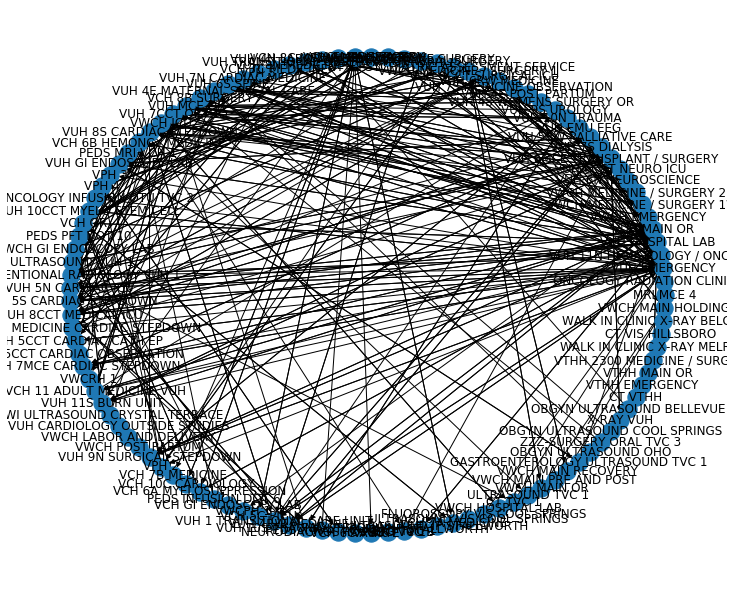

In [124]:
plt.figure(figsize=(10, 8))
nx.draw_shell(graph2_covid, with_labels=True)

In [125]:
close_covid = nx.closeness_centrality(graph2_covid)

bet_covid = nx.betweenness_centrality(graph2_covid)

ein_covid = nx.eigenvector_centrality(graph2_covid, 1000)

In [126]:
print(close_covid)

{'MRI MCE 4': 0.0, 'ONCOLOGY RADIATION CLINIC PRB B': 0.2385975170924793, 'VUH EMERGENCY': 0.4209920634920635, 'VUH 11N HEMATOLOGY / ONCOLOGY': 0.33950972862263185, 'VUH HOSPITAL LAB': 0.4172828823159219, 'VUH MAIN OR': 0.39141824085005905, 'VWCH EMERGENCY': 0.052521008403361345, 'VWCH MEDICINE / SURGERY 1W': 0.052521008403361345, 'VWCH MEDICINE / SURGERY 2': 0.03881987577639751, 'VUH 6N NEUROSCIENCE': 0.3075429035250463, 'VUH 6CCT NEURO ICU': 0.33950972862263185, 'VUH 6MCE TRANSPLANT / SURGERY': 0.3804145152036718, 'VUH 7S DIALYSIS': 0.3168000477783086, 'VUH 5RW PALLIATIVE CARE': 0.3200108590733591, 'VUH EMU EEG': 0.0, 'VUH 10N TRAUMA': 0.3547685928303906, 'VUH 9S UROLOGY': 0.32328742077035594, 'VUH 4S WOMENS SURGERY OR': 0.32439456947162426, 'VUH 4E POST PARTUM': 0.24413199558173784, 'VUH 7S MEDICINE OBSERVATION': 0.31365302743614004, 'VUH 6RW MEDICINE': 0.31365302743614004, 'VUH 9CCT SURGICAL ICU': 0.2905620070113935, 'VWCH MEDICINE / SURGERY 1': 0.05952380952380952, 'VPH PSYCHIATRI

In [127]:
print(bet_covid)

{'MRI MCE 4': 0.0, 'ONCOLOGY RADIATION CLINIC PRB B': 0.01270913770913771, 'VUH EMERGENCY': 0.26767791840312943, 'VUH 11N HEMATOLOGY / ONCOLOGY': 0.0028771294913212215, 'VUH HOSPITAL LAB': 0.2490273288746176, 'VUH MAIN OR': 0.04520693560092619, 'VWCH EMERGENCY': 0.06603925353925355, 'VWCH MEDICINE / SURGERY 1W': 0.0008848133848133851, 'VWCH MEDICINE / SURGERY 2': 0.0, 'VUH 6N NEUROSCIENCE': 0.006354568854568855, 'VUH 6CCT NEURO ICU': 0.009752784380220302, 'VUH 6MCE TRANSPLANT / SURGERY': 0.0583032712537219, 'VUH 7S DIALYSIS': 0.0012048466158235066, 'VUH 5RW PALLIATIVE CARE': 0.0033318504653492365, 'VUH EMU EEG': 0.0, 'VUH 10N TRAUMA': 0.005824853894706837, 'VUH 9S UROLOGY': 0.0010337476855334, 'VUH 4S WOMENS SURGERY OR': 0.06595881595881596, 'VUH 4E POST PARTUM': 0.0, 'VUH 7S MEDICINE OBSERVATION': 0.0005648346050131766, 'VUH 6RW MEDICINE': 0.01115973672088223, 'VUH 9CCT SURGICAL ICU': 0.0008631141443641443, 'VWCH MEDICINE / SURGERY 1': 0.03736325611325611, 'VPH PSYCHIATRIC ASSESSMENT 

In [128]:
print(ein_covid)

{'MRI MCE 4': 8.61814396054184e-20, 'ONCOLOGY RADIATION CLINIC PRB B': 0.009996077791763026, 'VUH EMERGENCY': 0.3929432183973259, 'VUH 11N HEMATOLOGY / ONCOLOGY': 0.1135806609200913, 'VUH HOSPITAL LAB': 0.24377326693837625, 'VUH MAIN OR': 0.33294791694958303, 'VWCH EMERGENCY': 3.9083331511772624e-08, 'VWCH MEDICINE / SURGERY 1W': 3.9083331511772624e-08, 'VWCH MEDICINE / SURGERY 2': 3.1712655320326314e-08, 'VUH 6N NEUROSCIENCE': 0.05141044790566347, 'VUH 6CCT NEURO ICU': 0.16544059710038186, 'VUH 6MCE TRANSPLANT / SURGERY': 0.24119489570462496, 'VUH 7S DIALYSIS': 0.11479073465603105, 'VUH 5RW PALLIATIVE CARE': 0.13407093133683654, 'VUH EMU EEG': 8.61814396054184e-20, 'VUH 10N TRAUMA': 0.13082390160633559, 'VUH 9S UROLOGY': 0.13849946817583847, 'VUH 4S WOMENS SURGERY OR': 0.05515440977853914, 'VUH 4E POST PARTUM': 0.0062241542714605745, 'VUH 7S MEDICINE OBSERVATION': 0.10197605242882787, 'VUH 6RW MEDICINE': 0.10857063828035017, 'VUH 9CCT SURGICAL ICU': 0.10801513322603215, 'VWCH MEDICINE

In [136]:
edges_df_covid['to'].value_counts()[:20]

VUH MAIN OR                      33641
VUH EMERGENCY                    22601
VUH HOSPITAL LAB                 15266
VUH 4E POST PARTUM               11484
VUH 7S DIALYSIS                  11039
VUH 10N TRAUMA                   10426
VCH OR                           10095
VUH 8S CARDIAC STEPDOWN           9609
VUH 7CCT ORTHO                    9535
VUH 6MCE TRANSPLANT / SURGERY     8954
VUH 5N CARDIAC ICU                8916
VUH 4N LABOR AND DELIVERY         8800
VUH 6CCT NEURO ICU                8521
VUH 5CCT CARDIAC CATH EP          8401
VUH 8CCT MEDICAL ICU              8370
VUH 4S WOMENS SURGERY OR          8146
VUH 7N CARDIAC MEDICINE           7686
VUH 8N MEDICINE                   6985
VUH 6N NEUROSCIENCE               6886
VUH 9CCT SURGICAL ICU             6831
Name: to, dtype: int64

In [137]:
edges_df_covid['from'].value_counts()[:20]

VUH EMERGENCY                    54252
VUH MAIN OR                      40910
VUH HOSPITAL LAB                 15397
VCH EMERGENCY                    14635
VCH OR                           11488
VUH 7S DIALYSIS                  11009
VUH 4N LABOR AND DELIVERY         9851
VUH 4E MATERNAL SPECIAL CARE      9734
VUH 10N TRAUMA                    9628
VUH 5CCT CARDIAC CATH EP          9573
VUH 5N CARDIAC ICU                9191
VUH 4S WOMENS SURGERY OR          8750
VUH 8CCT MEDICAL ICU              8055
VUH 6MCE TRANSPLANT / SURGERY     7685
VWCH EMERGENCY                    7364
VUH 6CCT NEURO ICU                7123
VUH 7N CARDIAC MEDICINE           5985
VUH 7CCT ORTHO                    5914
VCH 5A PICU                       5884
VUH 9CCT SURGICAL ICU             5535
Name: from, dtype: int64

In [131]:
length_covid = []
for i in range(1, 1688194):
    if (postCovid.VISIT_OCCURRENCE_ID.values[i] != postCovid.VISIT_OCCURRENCE_ID.values[i-1]):
        length_covid.append((postCovid.VISIT_OCCURRENCE_ID.values[i-1], postCovid.DURATION_HOURS.values[i-1]))

In [132]:
length_df_covid = pd.DataFrame(length_covid, columns = ['id', 'length'])

In [138]:
length_df_covid[:20]

,id,length
0,319061642,143.333333
1,318092955,166.483333
2,268811298,49.216667
3,290531476,51.066667
4,298711305,232.383333
5,245931660,113.466667
6,245643455,20.083333
7,293502319,24.783333
8,294552399,48.750000
9,278651514,424.216667


In [134]:
# average length of stay
length_df_covid['length'].mean()

139.48021910839117

In [135]:
# total transfers
params_df_covid['weight'].sum()

431231